importing neccesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

Load the data set

In [ ]:
titanic_df = pd.read_csv('/content/titanic_dataset .csv')

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# change passenger ID as index
titanic_df.set_index('PassengerId', inplace=True)

checking the details of data set

In [ ]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
titanic_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Find and Fill in all the missing values present in all the columns in the dataset

In [ ]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
titanic_df.drop(['Name','Ticket'],axis=1,inplace=True) # no contribution to predict our taget variable

In [ ]:
plt.hist(titanic_df['Age'])
plt.show()


combining 'Sibsp' and 'Parch'

In [ ]:
titanic_df['Relatives'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [ ]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic_df.Embarked=titanic_df.Embarked.fillna(titanic_df.Embarked.mode()[0])

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        714 non-null    float64
 4   Fare       891 non-null    float64
 5   Embarked   891 non-null    object 
 6   Relatives  891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 55.7+ KB


In [ ]:
titanic_df.Age.skew()

0.38910778230082704


Since column 'Age' is a skewed distribution, use median for imputation of missing values.

In [ ]:
titanic_df.Age=titanic_df.Age.fillna(titanic_df.Age.median())

In [ ]:
titanic_df.isna().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Relatives    0
dtype: int64

all null values removed

In [ ]:
titanic_df.columns

In [ ]:
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']] # dropping some column

Check and handle outliers in at least 3 columns in the dataset

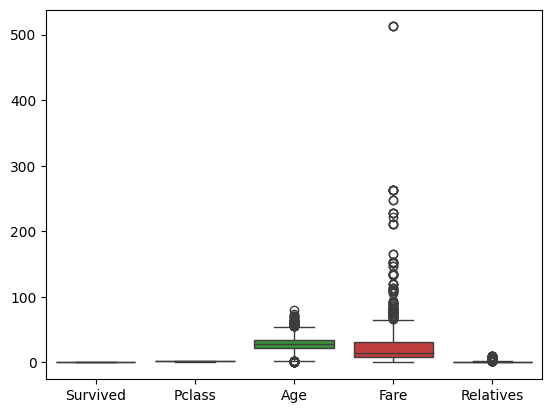

In [ ]:
sns.boxplot(titanic_df)
plt.show()

In [ ]:
titanic_df.Age.skew()

0.5102446555756495

In [ ]:
titanic_df.Fare.skew()

4.787316519674893

In [ ]:
titanic_df.Relatives.skew()

2.7274414739308535

All are skewed distributions. So use IQR (Inter Quartile Range) method for outlier detection

#IQR method for outlier detection and clip function for outlier handling

In [ ]:
for i in ['Age','Fare','Relatives']:
    Q1=np.percentile(titanic_df[i],25,method='midpoint')
    Q3=np.percentile(titanic_df[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in titanic_df[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    titanic_df[i]=titanic_df[i].clip(lower=low_lim,upper=up_lim)

checking again for outliers using boxplot

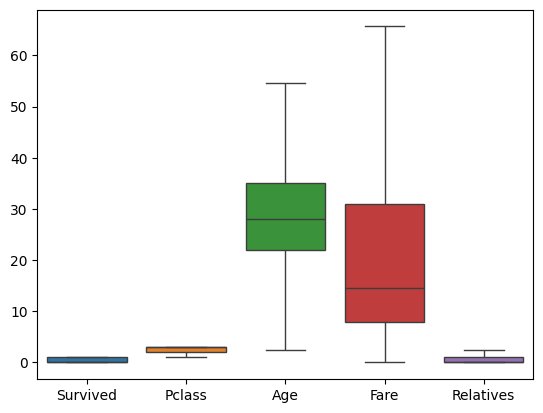

In [ ]:
sns.boxplot(titanic_df)
plt.show()

outliers have been removed

# One hot encoding

Encode columns 'Sex' and 'Embarked'

In [ ]:
titanic_df=pd.get_dummies(titanic_df).astype(float)

Min Max Scaling

In [ ]:
minmax=MinMaxScaler()
titanic_df_mm=minmax.fit_transform(titanic_df)
titanic_df_mm=pd.DataFrame(titanic_df_mm,columns=titanic_df.columns)

Correlation

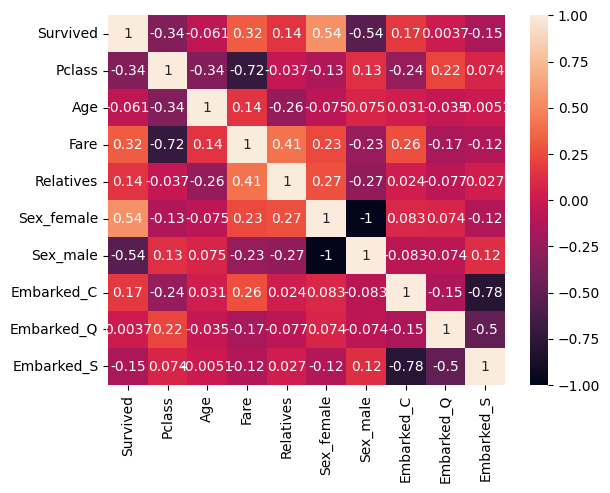

In [ ]:
sns.heatmap(titanic_df_mm.corr(),annot=True)
plt.show()

# Modeling

Predictors/ independent variables, x = Pclass, Age, Fare, Relatives, Sex and Embarked

Target / dependent variable, y = Survived

Differentiate x, y and split train, test

In [ ]:
x=titanic_df_mm.drop('Survived',axis=1)
y=titanic_df_mm.Survived
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

#KNN

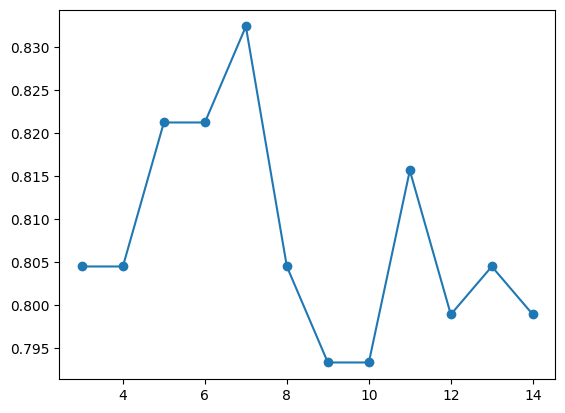

In [ ]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(x_train,y_train)
    knn_pred=knn.predict(x_test)
    metric_k.append(accuracy_score(y_test,knn_pred))
plt.plot(neighbors,metric_k,'o-')
plt.show()

High accuracy is for k = 7. So choose it and do classification.

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,metric='manhattan')
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('Accuracy of KNN Classifier is', round(accuracy_score(y_test,knn_pred)*100,2))

Accuracy of KNN Classifier is 83.24


#SVM

In [ ]:
svm=SVC(class_weight='balanced')
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
print('Accuracy of SVM Classifier is', round(accuracy_score(y_test,svm_pred)*100,2))

Accuracy of SVM Classifier is 79.33


# Cross Validation

# K FOLD

In [ ]:
kfold_validator=KFold(10,shuffle=True,random_state=42)

# KNN

In [ ]:
cv_result_knn=cross_val_score(knn,x,y,cv=kfold_validator)
print('Average cross validation score of KNN classifier is', cv_result_knn.mean())

Average cross validation score of KNN classifier is 0.7878277153558053


#SVM

In [ ]:
cv_result_svm=cross_val_score(svm,x,y,cv=kfold_validator)
print('Average cross validation score of SVM classifier is', cv_result_svm.mean())


Average cross validation score of SVM classifier is 0.8002122347066167


Stratified K Fold

In [ ]:
strat_validator=StratifiedKFold(n_splits=10,shuffle=True,random_state=10)

KNN

In [ ]:
str_cv_result_knn=cross_val_score(knn,x,y,cv=strat_validator)
print('Average cross validation score of KNN classifier is',str_cv_result_knn.mean())

Average cross validation score of KNN classifier is 0.7956928838951309


SVM

In [ ]:
str_cv_result_svm=cross_val_score(svm,x,y,cv=strat_validator)
print('Average cross validation score of SVM classifier is', str_cv_result_svm.mean())

Average cross validation score of SVM classifier is 0.8103245942571785


Comparison between Cross Validation Techniques

In [ ]:
mux = pd.MultiIndex.from_product([['Average Cross Validation Score'],['K Fold','Stratified K Fold']])
model=['KNN','SVM']
comp_table = pd.DataFrame([[cv_result_knn.mean(),str_cv_result_knn.mean()],[cv_result_svm.mean(),str_cv_result_svm.mean()]],columns=mux)
comp_table.index=model
comp_table

Average Cross Validation Score                  
                            K Fold Stratified K Fold
KNN                       0.787828          0.795693
SVM                       0.800212          0.810325

CONCLUSION:

Average cross validation scores of both KNN and SVM classifiers are slightly improved for stratified k fold technique compared to k fold technique.

For both cross validation techniques, SVM classifier performs better than KNN classifier.